<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


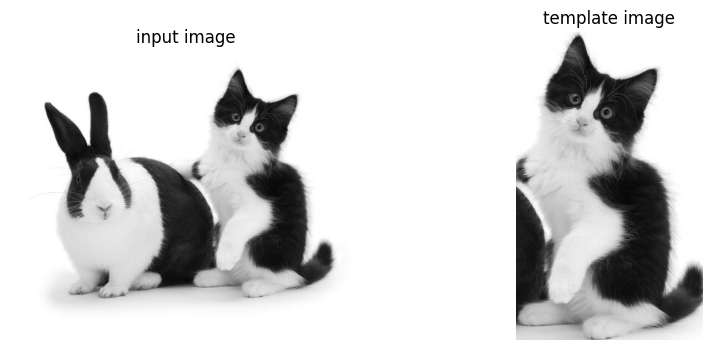

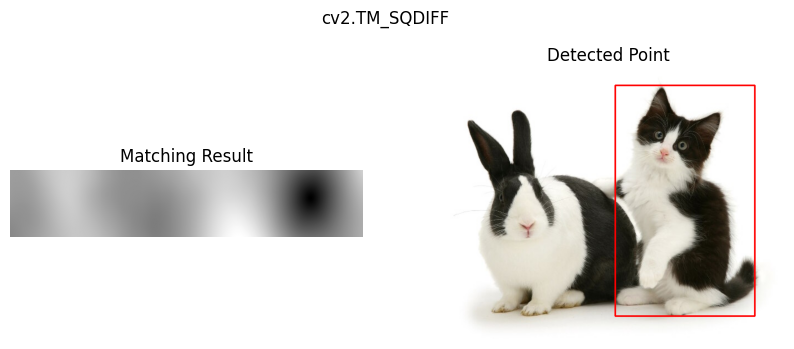

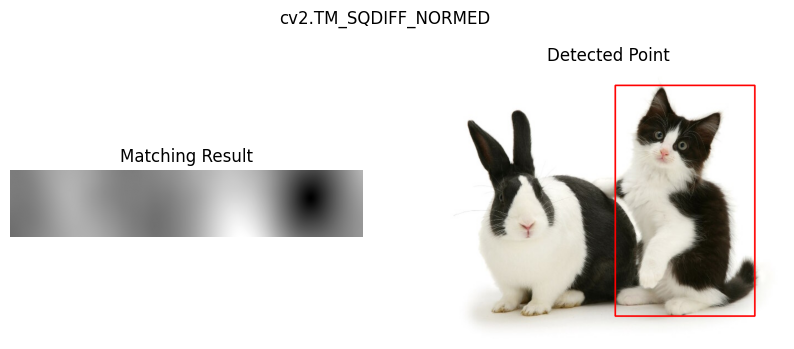

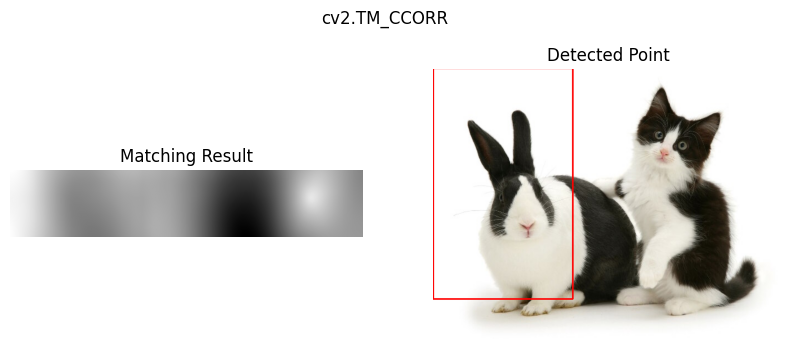

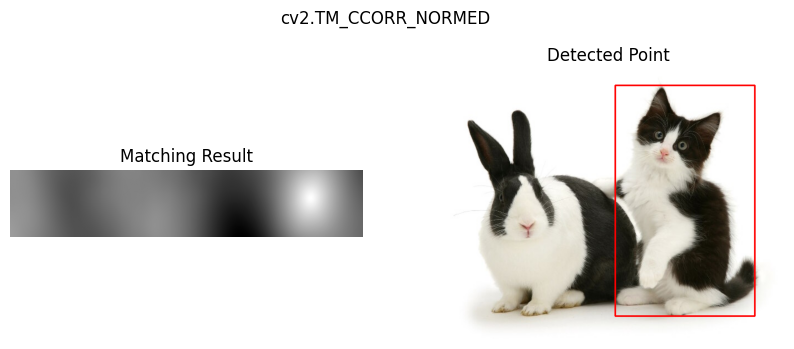

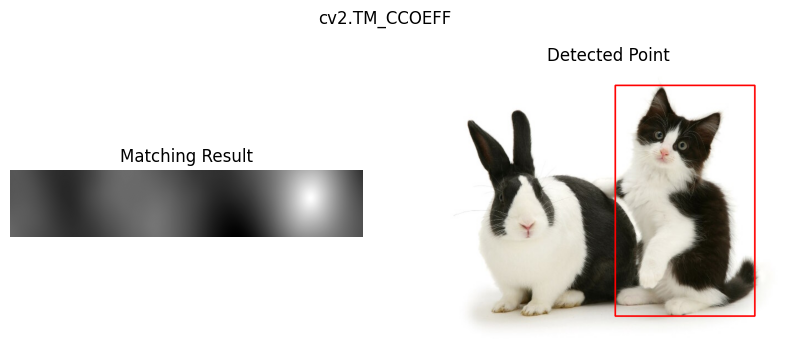

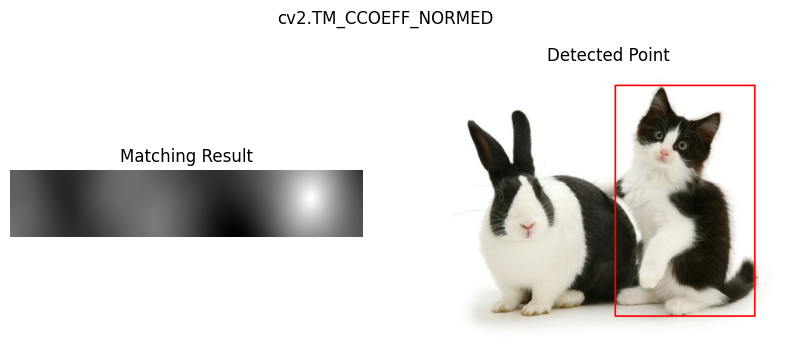

In [12]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar utama dan template
img = cv2.imread('/content/drive/MyDrive/Tugas PCVK/cat-and-rabbit.jpg')
template = cv2.imread('/content/drive/MyDrive/Tugas PCVK/cat-template.jpg')

# Konversi ke grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Ukuran template
w, h = template_gray.shape[::-1]

# Tampilkan gambar input dan template (seperti contoh)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('input image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template_gray, cmap='gray')
plt.title('template image')
plt.axis('off')

plt.show()

# Daftar metode Template Matching
methods = [
    'cv2.TM_SQDIFF',
    'cv2.TM_SQDIFF_NORMED',
    'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED',
    'cv2.TM_CCOEFF',
    'cv2.TM_CCOEFF_NORMED'
]

# Loop untuk setiap metode template matching
for meth in methods:
    img_copy = img.copy()
    method = eval(meth)

    # Template Matching
    res = cv2.matchTemplate(img_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Tentukan titik pencocokan terbaik
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak hasil pencocokan
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil
    plt.figure(figsize=(10, 4))
    plt.suptitle(meth)
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.axis('off')
    plt.show()
